In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Link to the front end application : https://itsmelps.github.io/CP-Rating-Convertor/

(11275, 5)


<Axes: >

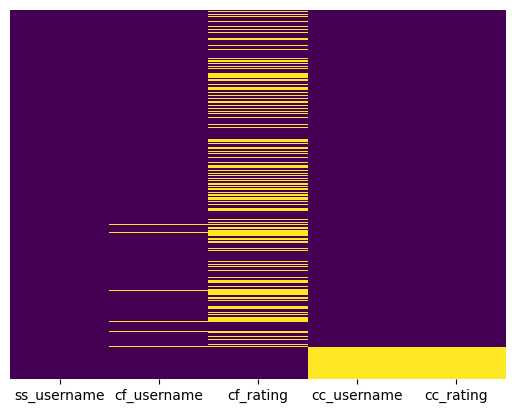

In [274]:
df = pd.read_csv("final_cccf.csv")
print(df.shape)
sns.heatmap(df.isnull(),cmap="viridis",yticklabels=[],cbar=None)

There are a lot of missing Codeforces ratings and a few missing codechef ratings. These records will be dropped because we need to train the regression model.

(6442, 5)


<Axes: >

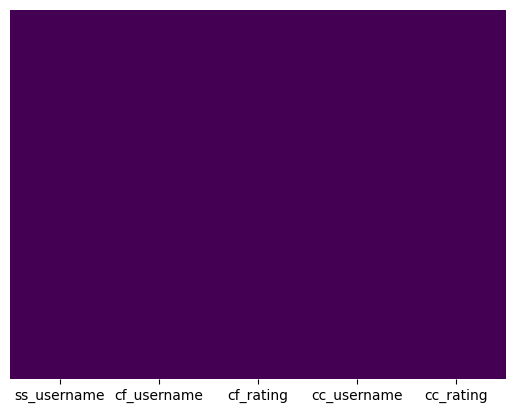

In [275]:
df.dropna(subset=["cf_rating","cc_rating"],inplace=True)
print(df.shape)
sns.heatmap(df.isnull(),cmap="viridis",yticklabels=[],cbar=None)

No missing values anymore because only the usernames of the missing ratings were missing

VISUALISING THE DATA

Text(0.5, 1.0, 'CodeChef and Codeforces Ratings')

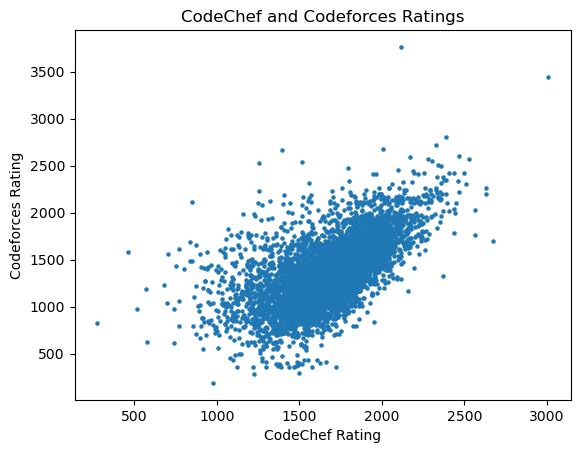

In [276]:
plt.scatter(data=df, x="cc_rating",y="cf_rating", s=5)
plt.xlabel("CodeChef Rating")
plt.ylabel("Codeforces Rating")
plt.title("CodeChef and Codeforces Ratings")

Calculation of the coefficient and the intercept using Linear Regression

In [277]:
#linear regression using gradient descent algorithm implemented using python classes

#The definition of all the functions

class LinearReg():
    def __init__(self,iterations,learning_rate): #The constructor that initialises variables
        self.iterations = iterations
        self.learning_rate = learning_rate



    def calcY(self,X): #Calculates the predicted values of petal width
        return X.dot(self.W) + self.b
    


    def gradientDescent(self): #implementation of gradient descent
        Y_cap = self.calcY(self.X)

        dW = -((self.X.T).dot(self.Y - Y_cap))/self.m #Calculating the gradients
        db = -(np.sum(self.Y - Y_cap))/self.m

        self.W -= self.learning_rate*dW #Changing the weights to minimise loss function
        self.b -= self.learning_rate*db

    
    def train(self,X,Y):
        self.m, self.n = X.shape #initialising all the variables
        self.X = X
        self.Y = Y  
        self.W = np.zeros((self.n,1)) #Setting the weights to 0 initially
        self.b = 0

        self.X = (self.X - np.mean(self.X, axis=0)) / np.std(self.X, axis=0)    #Scaling down data to have standard normal distribution 
        self.Y = (self.Y - np.mean(self.Y)) / np.std(self.Y)

        for x in range(self.iterations): #running the gradient descent until we reach minimum
            self.gradientDescent()
        
        self.b = np.mean(Y) - np.sum(self.W.T * np.mean(X, axis=0) / np.std(X, axis=0) * np.std(Y)) #scaling up data to the original range after the gradient descent
        self.W = self.W * np.std(Y) / np.std(X, axis=0)

In [278]:
from sklearn.model_selection import train_test_split
X=df['cc_rating'].values.reshape(-1,1)
Y=df['cf_rating'].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.33,random_state=1)

In [279]:
#Creating a new instance of the class using the train dataset with appropriate number of iterations and learning rate
model = LinearReg(iterations=20000,learning_rate=0.01)
model.train(X_train,Y_train)

In [280]:
print(model.W[0][0])
print(model.b)

0.8315626513332224
-30.199863065702175
